## 一、读取数据

In [1]:
!pip install matplotlib
!pip install wordcloud
!pip install jieba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 5.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 6.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314459 sha256=af27b80f6b3f9ba55629b3d747938fbbf963a27a26768df28bb4ec218fd8466a
  Stored in directory: /Users/kaiyi/Library/Caches/pip/wheels/08/a1/a3/5c8ac52cc2f5782ffffc34c95c57c8e5ecb3063dc69541ee7c
Successfully built jieba


In [3]:
pip install snownlp

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
#导入必要的库
#导入必要的库
import pandas as pd
import numpy as np
from datetime import datetime
import re
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from wordcloud import WordCloud
from collections import Counter

In [5]:
#读取数据文件
df = pd.read_csv('merged_output.csv')

print(df.index)
print(df.columns)


RangeIndex(start=0, stop=2230, step=1)
Index(['content', '_id', 'like_counts', 'ip_location', 'created_at',
       'total_number', 'user_name', 'gender'],
      dtype='object')


## 二、数据清洗

In [6]:
#检查重复数据
print(df.duplicated(subset='_id').sum())  # 显示id列中重复数据的数量

80


In [7]:
#使用drop_duplicates方法，并指定subset参数为id，这样只会根据id列来识别重复行。
df.drop_duplicates(subset='_id', inplace=True)

In [8]:
#确认去除重复数据后的结果
print(df.duplicated(subset='_id').sum())  # 应输出0，表示没有重复的id

0


#检查content为空的数据

In [9]:
#检查content为空的数据
print(df['content'].isna().sum())  # 显示content列中空值的数量

0


#说明没有发现content为空的数据

In [10]:
# 计算每条评论的字符长度
df['content_length'] = df['content'].str.len()

# 找出少于5个字的评论
short_comments = df[df['content_length'] < 5]

# 打印统计信息
print(f"评论总数: {len(df)}")
print(f"少于5字的评论数量: {len(short_comments)}")

评论总数: 2150
少于5字的评论数量: 197


In [11]:
# 删除少于5字的评论
df = df[df['content'].str.len() >= 5]

# 重置索引
df = df.reset_index(drop=True)

# 打印清理后的数据量
print(f"清理后的数据量: {len(df)}")

清理后的数据量: 1953


In [12]:
#把ip_location列中的值的“来自”前缀删除
df['ip_location'] = df['ip_location'].str.replace('来自', '').str.strip()


In [13]:
display(df)

,content,_id,like_counts,ip_location,created_at,total_number,user_name,gender,content_length
0,图片评论 http://t.cn/A6ncW10g,5094859627037156,390,北京,Tue Oct 29 17:04:15 +0800 2024,16,MS培养基_,f,25
1,我咋感觉都是扯淡,5094853815308695,129,北京,Tue Oct 29 16:41:10 +0800 2024,11,ShowMakerr_,m,8
2,别信广告，看疗效,5094860929107609,117,菲律宾,Tue Oct 29 17:09:26 +0800 2024,2,竹杖芒鞋轻胜马-Serendipity,m,8
3,幼儿园摇号没有中，一年光学费就4W[裂开]还不包含生活费服装费等。。。。而且，我主要也是不想...,5094852339435606,86,山东,Tue Oct 29 16:35:18 +0800 2024,3,七元姓名,m,76
4,我只看数据，有多少钱发过来[吃瓜],5094856546061749,64,浙江,Tue Oct 29 16:52:01 +0800 2024,0,郑在输入0818,m,17
...,...,...,...,...,...,...,...,...,...
1948,我奇怪，我是个男的，女方生育，为什么需要男方交生育险的，女方才享有补贴？？？那些不结婚的，找...,5094831514192924,0,广东,Tue Oct 29 15:12:33 +0800 2024,0,放开那条乌贼犹鱼让我来sha,f,89
1949,一切都在男女双方正常工作并且参保的基础上，这个就排除了很多人,5094824610889895,0,江苏,Tue Oct 29 14:45:06 +0800 2024,0,悦己----女王,f,30
1950,希望能领到哈哈哈哈,5094821621138601,0,广东,Tue Oct 29 14:33:13 +0800 2024,0,电影院游客,m,9
1951,留着以后用,5094821268819849,0,广东,Tue Oct 29 14:31:50 +0800 2024,0,小饼蛙,m,5


In [14]:

# 保存 DataFrame 到 CSV 文件
file_name = 'output.csv'  # 自定义文件名“output”
df.to_csv(file_name, index=False)

print(f"DataFrame 已保存为 {file_name}")

DataFrame 已保存为 output.csv


In [15]:
#打印前5行数据
display(df.head())

,content,_id,like_counts,ip_location,created_at,total_number,user_name,gender,content_length
0,图片评论 http://t.cn/A6ncW10g,5094859627037156,390,北京,Tue Oct 29 17:04:15 +0800 2024,16,MS培养基_,f,25
1,我咋感觉都是扯淡,5094853815308695,129,北京,Tue Oct 29 16:41:10 +0800 2024,11,ShowMakerr_,m,8
2,别信广告，看疗效,5094860929107609,117,菲律宾,Tue Oct 29 17:09:26 +0800 2024,2,竹杖芒鞋轻胜马-Serendipity,m,8
3,幼儿园摇号没有中，一年光学费就4W[裂开]还不包含生活费服装费等。。。。而且，我主要也是不想...,5094852339435606,86,山东,Tue Oct 29 16:35:18 +0800 2024,3,七元姓名,m,76
4,我只看数据，有多少钱发过来[吃瓜],5094856546061749,64,浙江,Tue Oct 29 16:52:01 +0800 2024,0,郑在输入0818,m,17


## 三、可视化分析

### 3.1、IP属地柱状图

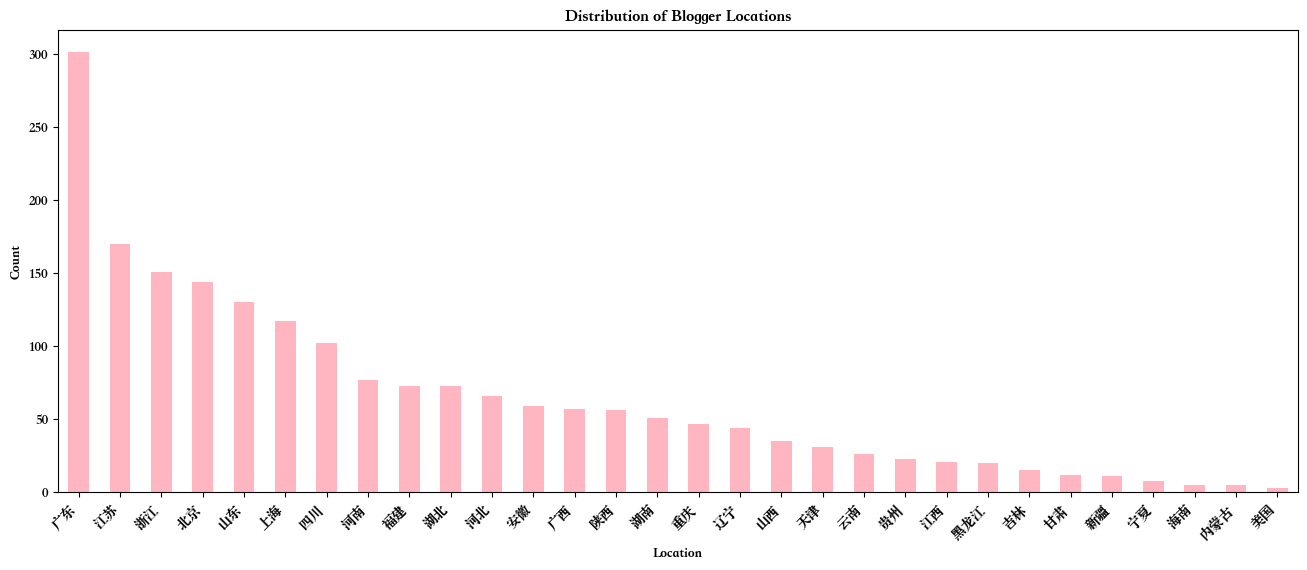

In [16]:

# Set global font
plt.rcParams['font.family'] = 'Songti SC'
plt.rcParams['axes.unicode_minus'] = False  # To display the minus sign normally

# IP location analysis
plt.figure(figsize=(16, 6))
countries = df['ip_location'].value_counts().head(30)  # Only show the top 30

# Using soft pink color
countries.plot(kind='bar', color='#FFB6C1')  # Light pink color

plt.title('Distribution of Blogger Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
# Display the chart
plt.show()


### 打印点赞数前30的评论

In [17]:
# 按点赞数排序并显示前30条评论
top_likes = df.nlargest(30, 'like_counts')[['content', 'like_counts', 'created_at']]

# 或者使用更整洁的display方式（在Jupyter中）
display(top_likes)


,content,like_counts,created_at
1387,每天八小时工作制，周末强制双休。比补贴强[挖鼻],16030,Wed Oct 30 18:26:59 +0800 2024
1388,教育医疗住房，能解决这三件事再让人生吧~,8088,Wed Oct 30 07:48:41 +0800 2024
1389,有钱的人生孩子才会幸福 没钱的生孩子只会加倍痛苦,5213,Wed Oct 30 18:42:18 +0800 2024
1390,鼓励鼓励鼓励，支持支持支持。公司:我同意但我还是不录用,4311,Wed Oct 30 18:40:00 +0800 2024
1391,“法拉利5元代金券”,3834,Wed Oct 30 18:49:37 +0800 2024
849,口袋没钱，谁也别叫我生孩子,3673,Tue Oct 29 15:53:42 +0800 2024
1392,直面超想休，不敢休，不能休,2665,Wed Oct 30 19:03:40 +0800 2024
850,先帮我买上学区房，再帮我把奶粉钱培训费托管费准备好，把社保不报销的大病商业医疗买好。,2447,Tue Oct 29 16:11:25 +0800 2024
851,专家就是不肯睁开眼看看很多人一天12小时都在上班和上下班路上，剩下一点点自己时间还要吃饭清理...,2133,Tue Oct 29 17:06:54 +0800 2024
852,当初的宣传的好：少生优生幸福一生,1678,Tue Oct 29 17:06:16 +0800 2024


### 3.2、互动数分布箱体图

/var/folders/2s/f7fc9t5n6ln0h62x2t_q79v80000gn/T/ipykernel_18924/3197068011.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df['like_counts'], positions=[1], labels=['用户活跃度'])


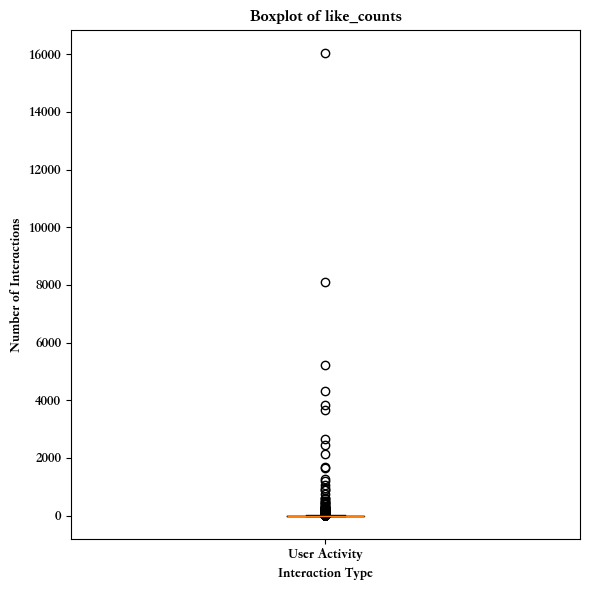

In [17]:
# 绘制箱型图
plt.figure(figsize=(6, 6))  # 设置图表大小

# 使用matplotlib的boxplot函数
plt.boxplot(df['like_counts'], positions=[1], labels=['用户活跃度'])
# 设置图表样式
plt.title('Boxplot of like_counts')
plt.xlabel('Interaction Type')
plt.ylabel('Number of Interactions')
plt.xticks(ticks=[1], labels=['User Activity'])
# 显示图表
plt.tight_layout()
plt.show()

### 3.3、文本分词以及去除停用词

In [25]:
# 导入必要的库
import jieba
import re

# 读取中文停用词表
def load_stopwords(file_path='hit_stopwords.txt'):
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            return set([line.strip() for line in f])
    except FileNotFoundError:
        return set()

stop_words = load_stopwords()

# 把所有的content内容连接起来
text = ' '.join(df['content'])

# 使用正则表达式清理文本
text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # 过滤网址
text = re.sub(r'\[.*?\]', '', text)  # 过滤微博表情（中括号内容）
text = re.sub(r'\【.*?\】', '', text)  # 过滤【】中的内容
text = re.sub(r'\n+', ' ', text)  # 过滤换行符
text = re.sub(r'\s+', ' ', text)  # 合并多个空格为一个

print("清理后的文本:")
print(text[:200])  # 只打印前200个字符

# 使用jieba进行分词
word_list = jieba.lcut(text)

# 过滤停用词和非中文字符
filtered_words = [word for word in word_list 
                 if word not in stop_words 
                 and re.match(r'[\u4e00-\u9fa5]+', word)  # 只保留中文字符
                 and len(word) > 1]  # 过滤单字词

# 将分词结果连接成字符串
filtered_text = ' '.join(filtered_words)

print('\n分词结果示例:')
print(filtered_text[:200])

print('\n词语数量:', len(filtered_words))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/2s/f7fc9t5n6ln0h62x2t_q79v80000gn/T/jieba.cache


清理后的文本:
图片评论 我咋感觉都是扯淡 别信广告，看疗效 幼儿园摇号没有中，一年光学费就4W还不包含生活费服装费等。。。。而且，我主要也是不想生了孩子以后还得做作业，写了十来年作业了，怕了 我只看数据，有多少钱发过来 画饼是吧？ 想空手套白狼🐺🐺🐺🐺 我们一个普通幼儿园一学期1万4，一个月工资就四五千 没有一个落地措施，全是大饼 竟说一些大空话 先把五天八小时，双休制度落实了吧 估计实现不了 反正我不敢生 鼓


Loading model cost 0.325 seconds.
Prefix dict has been built successfully.



分词结果示例:
图片 评论 感觉 扯淡 别信 广告 疗效 幼儿园 摇号 没有 一年 学费 包含 生活费 服装费 而且 主要 不想 孩子 以后 做作业 十来 作业 数据 多少 发过来 画饼 想空 手套 白狼 我们 一个 普通 幼儿园 学期 一个月 工资 四五千 没有 一个 落地 措施 全是 大饼 一些 空话 五天 八小时 双休 制度 落实 估计 实现 不了 反正 不敢 鼓励 督促 支持 劳动法 每周 工作 时间 加

词语数量: 13926


   word  frequency
0    工作         96
1    落实         78
2    问题         77
3    解决         67
4    教育         61
5    时间         58
6    不生         55
7    鼓励         53
8    公司         46
9    很多         42
10   二胎         42
11   双休         41
12   就业         41
13   产假         41
14  越来越         41
15   结婚         38
16   怀孕         37
17   社会         37
18   知道         36
19   支持         35


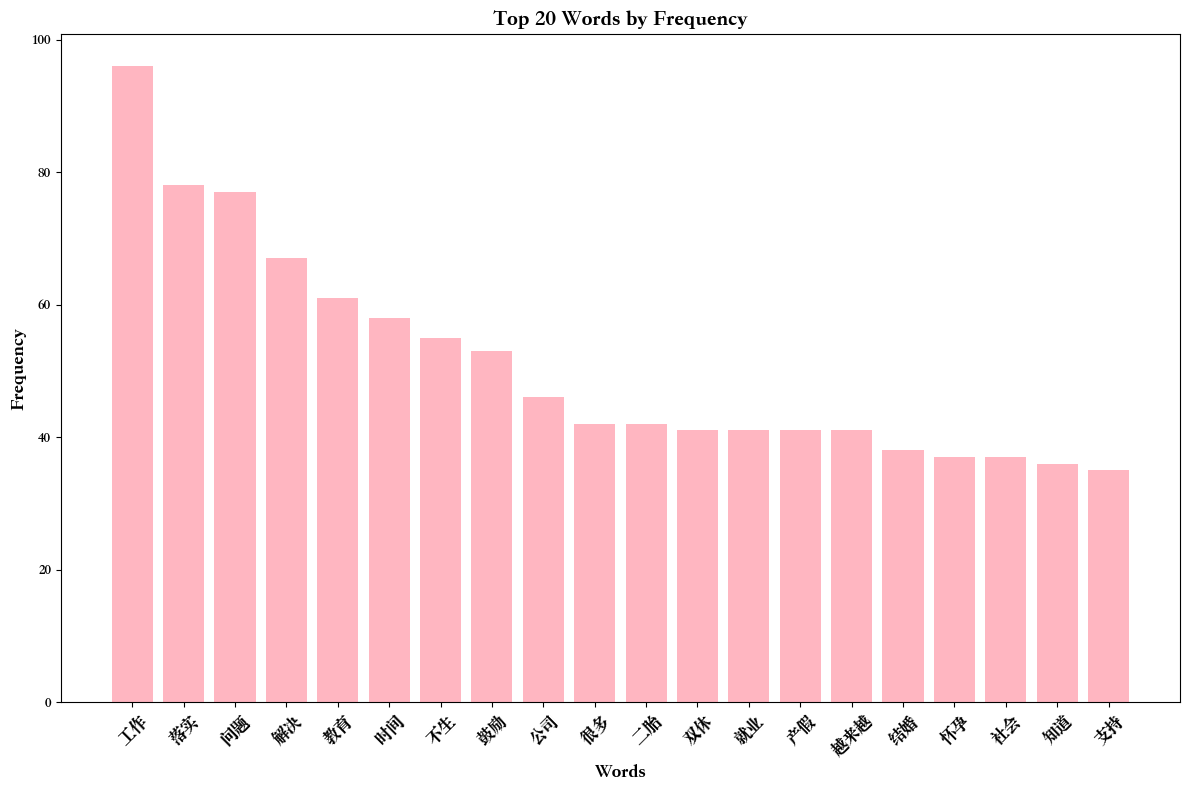

In [ ]:
# 统计词频
word_counts = Counter(filtered_words)
# 按词频从大到小排序
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# 只保留前20个高频词
top_20_words = sorted_word_counts[:20]

# 将词频统计结果转换为DataFrame
word_freq_df = pd.DataFrame(top_20_words, columns=['word', 'frequency'])

# 打印词频统计结果
print(word_freq_df)

# 创建柱状图
plt.figure(figsize=(12, 8))

# 提取词汇和频率
words = word_freq_df['word']
frequencies = word_freq_df['frequency']

# 绘制柱状图
plt.bar(words, frequencies, color='#FFB6C1')

# 设置图表标题和轴标签
plt.title('Top 20 Words by Frequency', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# 旋转X轴的标签，避免重叠
plt.xticks(rotation=45, fontsize=12)

# 显示图表
plt.tight_layout()  # 自动调整子图参数，使之填充整个图表区域
plt.savefig('top_20_words.png', dpi=300)
plt.show()

### 3.4、情感分析

In [19]:
# 定义清理文本的函数
def clean_text(text):
    # 转换为字符串
    text = str(text)
    
    # 清理各种模式
    text = re.sub(r'回复@.*?:', '', text)  # 删除"回复@用户:"
    text = re.sub(r'@.*?\s', '', text)     # 删除"@用户"
    text = re.sub(r'\[.*?\]', '', text)    # 删除表情符号 [笑哭] 等
    text = re.sub(r'【.*?】', '', text)     # 删除【】中的内容
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # 删除网址
    text = re.sub(r'\n+', ' ', text)       # 删除换行符
    text = re.sub(r'\s+', ' ', text)       # 合并多个空格
    text = text.strip()                    # 删除首尾空格
    
    return text

# 创建清理后的新列
df['cleaned_content'] = df['content'].apply(clean_text)

# 打印一些示例查看清理效果
print("清理前后对比：")
for i in range(5):
    print("\n原文：", df['content'].iloc[i])
    print("清理后：", df['cleaned_content'].iloc[i])

清理前后对比：

原文： 图片评论 http://t.cn/A6ncW10g
清理后： 图片评论

原文： 我咋感觉都是扯淡
清理后： 我咋感觉都是扯淡

原文： 别信广告，看疗效
清理后： 别信广告，看疗效

原文： 幼儿园摇号没有中，一年光学费就4W[裂开]还不包含生活费服装费等。。。。而且，我主要也是不想生了孩子以后还得做作业[允悲]，写了十来年作业了，怕了[泪]
清理后： 幼儿园摇号没有中，一年光学费就4W还不包含生活费服装费等。。。。而且，我主要也是不想生了孩子以后还得做作业，写了十来年作业了，怕了

原文： 我只看数据，有多少钱发过来[吃瓜]
清理后： 我只看数据，有多少钱发过来



情感分析结果统计：
平均情感得分: 0.358
情感分布:
sentiment
消极    1178
积极     461
中性     314
Name: count, dtype: int64


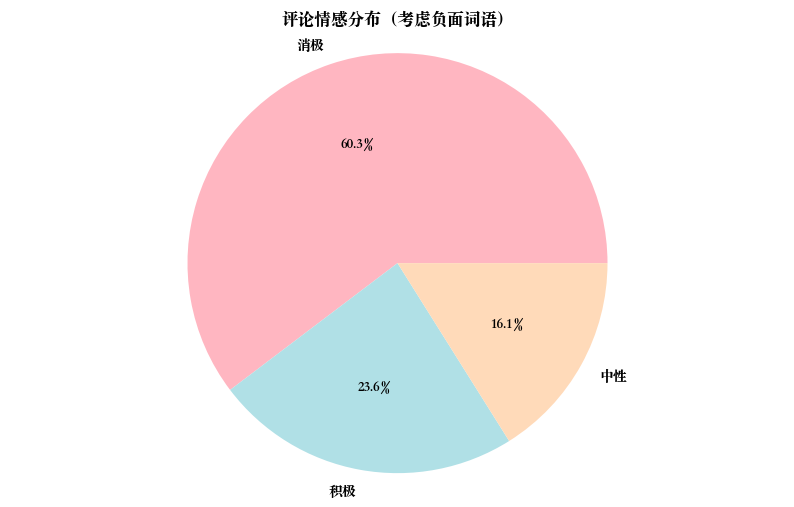


示例评论及其情感分析：

评论: 一个支原体，都能劝退我二胎
情感得分: 0.060
情感类别: 消极

评论: 你先解决不用中考，能直接上高中再说吧
情感得分: 0.392
情感类别: 消极

评论: 完全的空话嘛
情感得分: 0.100
情感类别: 消极
包含的负面词语: ['空话']

评论: 不关我的事
情感得分: 0.144
情感类别: 消极

评论: 一个月补贴800，农村大把人生。我爸妈在农村，国家发的老人金一个月才一百多，800已经是很多很多了，唉！
情感得分: 0.298
情感类别: 消极


In [20]:
from snownlp import SnowNLP

# 读取负面词语列表
def load_negative_words(file_path='negative_words.txt'):
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            return set([line.strip() for line in f])
    except FileNotFoundError:
        print("未找到负面词语文件")
        return set()

negative_words = load_negative_words()

# 修改情感分析函数，考虑负面词语的影响
def get_sentiment_adjusted(text):
    try:
        # 基础情感得分
        base_score = SnowNLP(str(text)).sentiments
        
        # 检查负面词语
        text = str(text)
        neg_word_count = sum(1 for word in negative_words if word in text)
        
        # 根据负面词语数量调整得分
        if neg_word_count > 0:
            # 每个负面词降低50%的得分，最多降低90%
            adjustment = min(0.5 * neg_word_count, 0.9)
            adjusted_score = base_score * (1 - adjustment)
            return adjusted_score
        return base_score
    except:
        return None

# 添加调整后的情感得分列
df['sentiment_score'] = df['cleaned_content'].apply(get_sentiment_adjusted)

# 将情感得分分为积极、消极和中性
df['sentiment'] = df['sentiment_score'].apply(lambda x: 
    '积极' if x > 0.6 
    else '消极' if x < 0.4 
    else '中性')

# 打印情感分析结果统计
print("\n情感分析结果统计：")
print(f"平均情感得分: {df['sentiment_score'].mean():.3f}")
print(f"情感分布:")
print(df['sentiment'].value_counts())

# 绘制情感分布饼图
plt.figure(figsize=(10, 6))
plt.pie(df['sentiment'].value_counts(), 
        labels=df['sentiment'].value_counts().index, 
        autopct='%1.1f%%', 
        colors=['#FFB6C1', '#B0E0E6', '#FFDAB9'])
plt.title('评论情感分布（考虑负面词语）')
plt.axis('equal')
plt.show()

# 打印一些示例进行对比
print("\n示例评论及其情感分析：")
sample_df = df[['cleaned_content', 'sentiment_score', 'sentiment']].sample(5)
for _, row in sample_df.iterrows():
    print(f"\n评论: {row['cleaned_content']}")
    print(f"情感得分: {row['sentiment_score']:.3f}")
    print(f"情感类别: {row['sentiment']}")
    # 显示包含的负面词语
    neg_words_found = [word for word in negative_words if word in row['cleaned_content']]
    if neg_words_found:
        print(f"包含的负面词语: {neg_words_found}")

### 3.5、分别统计男女性情感


各性别情感分布数量：
sentiment   中性   消极   积极
gender                  
f          168  696  253
m          146  482  208

各性别情感分布百分比：
sentiment         中性         消极         积极
gender                                    
f          15.040286  62.309758  22.649955
m          17.464115  57.655502  24.880383


<Figure size 1000x600 with 0 Axes>

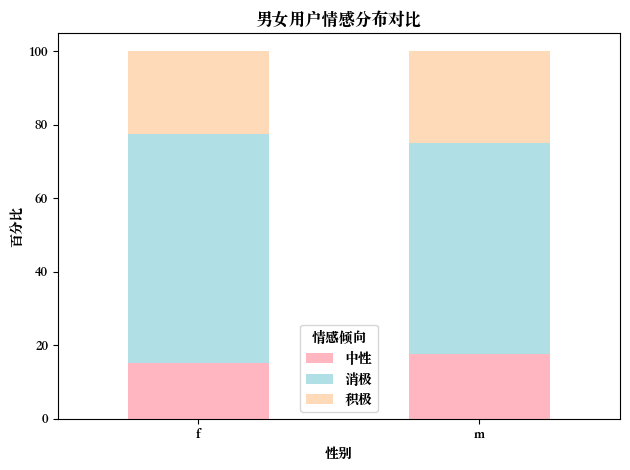

In [22]:
# 按性别分组统计情感
gender_sentiment = df.groupby(['gender', 'sentiment']).size().unstack(fill_value=0)

# 计算每个性别的情感百分比
gender_sentiment_pct = gender_sentiment.div(gender_sentiment.sum(axis=1), axis=0) * 100

# 打印统计结果
print("各性别情感分布数量：")
print(gender_sentiment)
print("\n各性别情感分布百分比：")
print(gender_sentiment_pct)

# 绘制堆叠柱状图
plt.figure(figsize=(10, 6))
gender_sentiment_pct.plot(kind='bar', stacked=True, 
                         color=['#FFB6C1', '#B0E0E6', '#FFDAB9'])
plt.title('男女用户情感分布对比')
plt.xlabel('性别')
plt.ylabel('百分比')
plt.legend(title='情感倾向')
plt.xticks(rotation=0)


plt.tight_layout()
plt.show()





### 3.6、生成词云

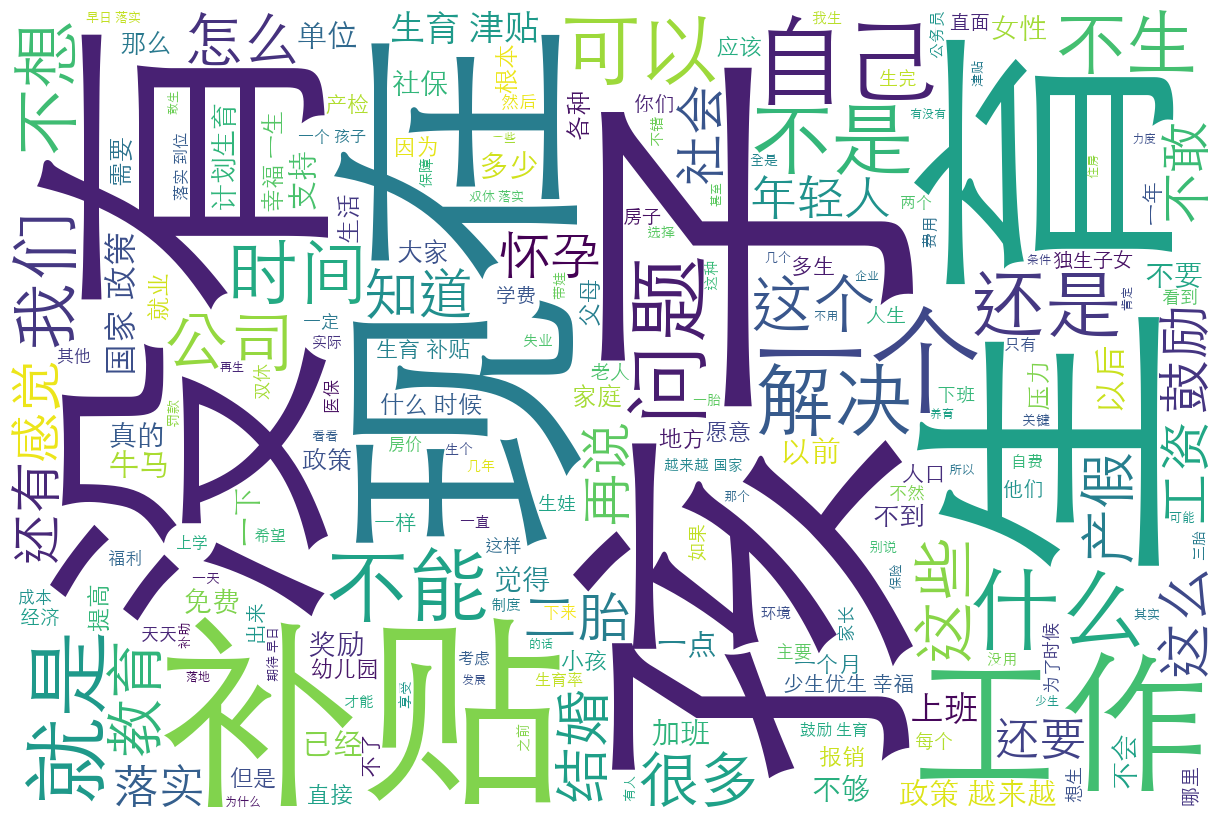

In [ ]:

# 生成词云
font_path = '/System/Library/Fonts/STHeiti Light.ttc'
wordcloud = WordCloud(
    font_path=font_path, 
    max_words=200, 
    width=1200, 
    height=800, 
    background_color='white',
    colormap='viridis', 
    prefer_horizontal=0.7,  # 70%的词水平显示
    random_state=42  # 固定随机状态以保持一致的效果
).generate(filtered_text)

# 显示词云图
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 不显示坐标轴
plt.tight_layout(pad=0)  # 减少边距
plt.show()

# 保存词云图到文件
wordcloud.to_file('wordcloud.png')